### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

# Movie Lens Project Solution
## Author: Jinad Patel
## Emaill: Jinadpatel@gmail.com
## Github URL: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-jinadpatel/tree/master/MovieLens%20Project%201

#### 1. Import the necessary packages - 2.5 marks

In [1]:
# Data manipulation tools
import numpy as np
import pandas as pd
# Data Visualisation tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
# Data formation tools
from scipy.stats import zscore

In [2]:
# Configuration for the notebook
pd.options.display.float_format = '{:,.2f}'.format

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
# DataFrame contains information about the ratings given to the movies.
df_ratings = pd.read_csv('Data.csv')
df_ratings.name = "Ratings"
df_ratings.head(10)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [4]:
# DataFrame contains information about movies and its genres.
df_movies = pd.read_csv('item.csv')
df_movies.name = "Movies Genres"
df_movies.head(10)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe,01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III,22-Jan-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
# DataFrame contains information about Users who gave the ratings.
df_users = pd.read_csv('user.csv')
df_users.name = "Users Data"
df_users.head(10)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [6]:
# Generic Function used to display info, shape & 5-point summary
def summarize_data(data):
    print("\n============",data.name,"=============\n")
    ## info
    print("\nInfo:")
    print(data.info())
    print('================')
    ## shape
    shape = data.shape
    print("\nShape:")
    print(shape)
    print('================')
    ## Describe(5 point summary)
    print("\nDescribe:")
    print(data.describe().T)

In [7]:
# Summarize Raings
summarize_data(df_ratings)


============ Ratings =============


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None

Shape:
(100000, 4)

Describe:
               count           mean          std            min  \
user id   100,000.00         462.48       266.61           1.00   
movie id  100,000.00         425.53       330.80           1.00   
rating    100,000.00           3.53         1.13           1.00   
timestamp 100,000.00 883,528,851.49 5,343,856.19 874,724,710.00   

                     25%            50%            75%            max  
user id           254.00         447.00         682.00         943.00  
movie id          175.00         322.00         631.00     

In [8]:
# Summarize Movies
summarize_data(df_movies)


============ Movies Genres =============


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18

In [9]:
# Summarize Users info
summarize_data(df_users)


============ Users Data =============


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None

Shape:
(943, 5)

Describe:
         count   mean    std  min    25%    50%    75%    max
user id 943.00 472.00 272.36 1.00 236.50 472.00 707.50 943.00
age     943.00  34.05  12.19 7.00  25.00  31.00  43.00  73.00


#### 4. Find the number of movies per genre using the item data - 5 marks

In [10]:
# Get the columns without movie id, title and release date as we don't need them
movies_genres = [col for col in df_movies if col != "movie id" and col != "movie title" and col != "release date"]
genres_counts = df_movies[movies_genres].sum()
df_out = pd.DataFrame({'Genres': movies_genres,"Number of movies": genres_counts})
df_out.reset_index(drop=True,inplace=True)
df_out

,Genres,Number of movies
0,unknown,1
1,Action,251
2,Adventure,135
3,Animation,42
4,Childrens,122
5,Comedy,505
6,Crime,109
7,Documentary,50
8,Drama,725
9,Fantasy,22


#### 5. Find the movies that have more than one genre - 2.5 marks

In [11]:
# Get the movie titles and store in a series
s_movie_titles = df_movies['movie title']
# Get the Genres sum for each movie and store it in a series
s_genres_repeated = df_movies[movies_genres].sum(axis=1)
# Create data frame
df_out_2 = pd.DataFrame({"Title":s_movie_titles,"Number of Genres":s_genres_repeated})
updated_df = df_out_2[df_out_2['Number of Genres'] > 1]
# Get the count
updated_count = updated_df['Number of Genres'].count()
print("There are total of",updated_count,"movies that have more than one genres.")
print(updated_df.to_string(index=False))

There are total of 849 movies that have more than one genres.
                                                                 Title  Number of Genres
                                                            Toy Story                  3
                                                            GoldenEye                  3
                                                           Get Shorty                  3
                                                              Copycat                  3
                                                       Twelve Monkeys                  2
                                                                 Babe                  3
                                                          Richard III                  2
                                                        Seven (Se7en)                  2
                                                  Usual Suspects, The                  2
                                                

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [12]:
# Get the index(s) of the data where movies are having genre as unknown.
drop_index = df_movies[df_movies['unknown'] == 1].index
df_movies.drop(drop_index, axis=0)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [13]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [14]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


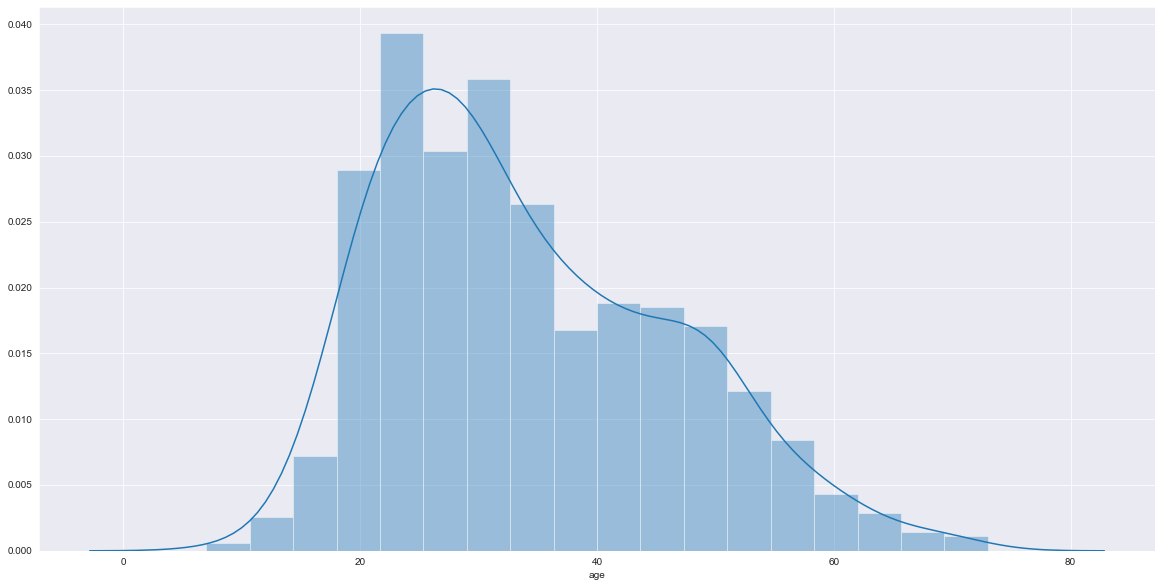

In [15]:
# Age
plt.figure(figsize=(20,10))
sns.distplot(df_users["age"]);

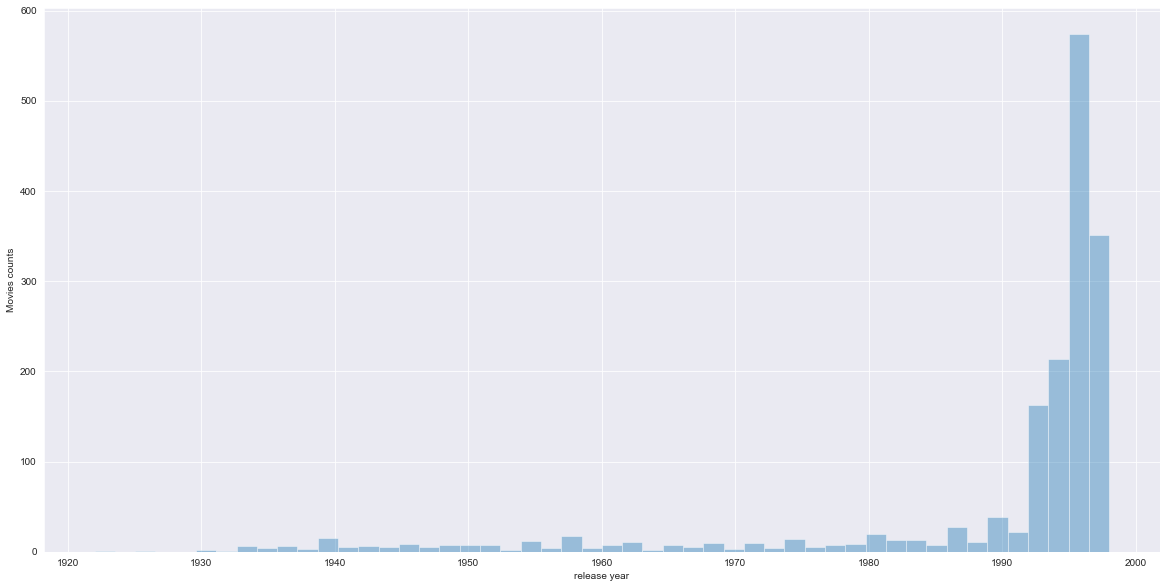

In [16]:
# Release Year
df_movies.head()
# Get Year from the date
release_years = [date[-4:] for date in df_movies['release date']]
df_movies['release year'] = release_years
plt.figure(figsize=(20,10))
sns.distplot(df_movies['release year'], kde=False).set(xlabel="release year", ylabel="Movies counts");

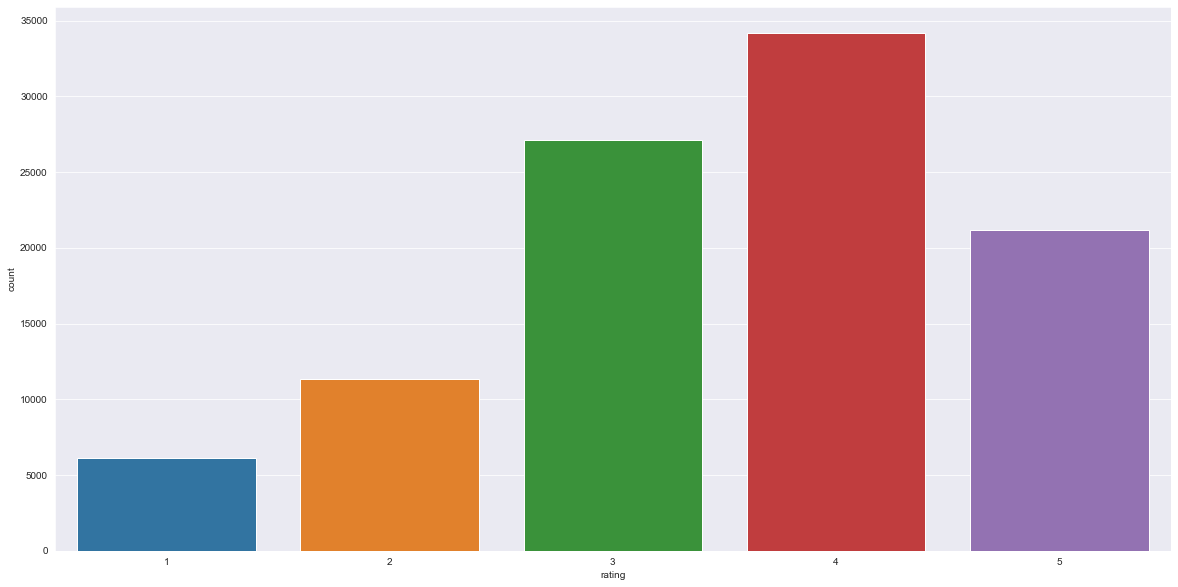

In [17]:
# Rating
plt.figure(figsize=(20,10))
sns.countplot(df_ratings['rating']);

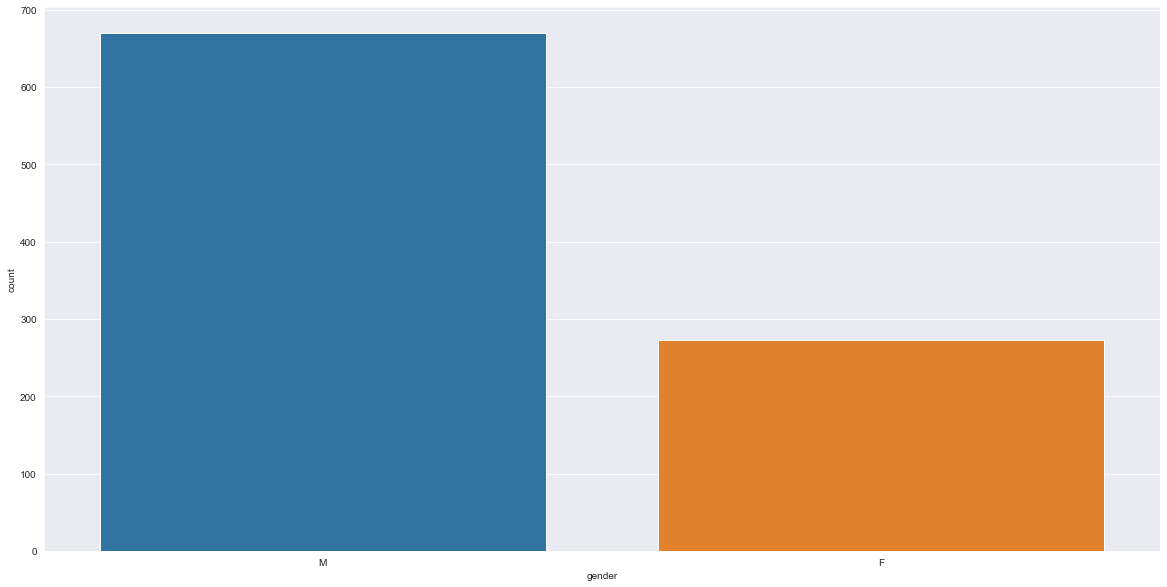

In [18]:
# Gender
plt.figure(figsize=(20,10))
sns.countplot(df_users['gender']);

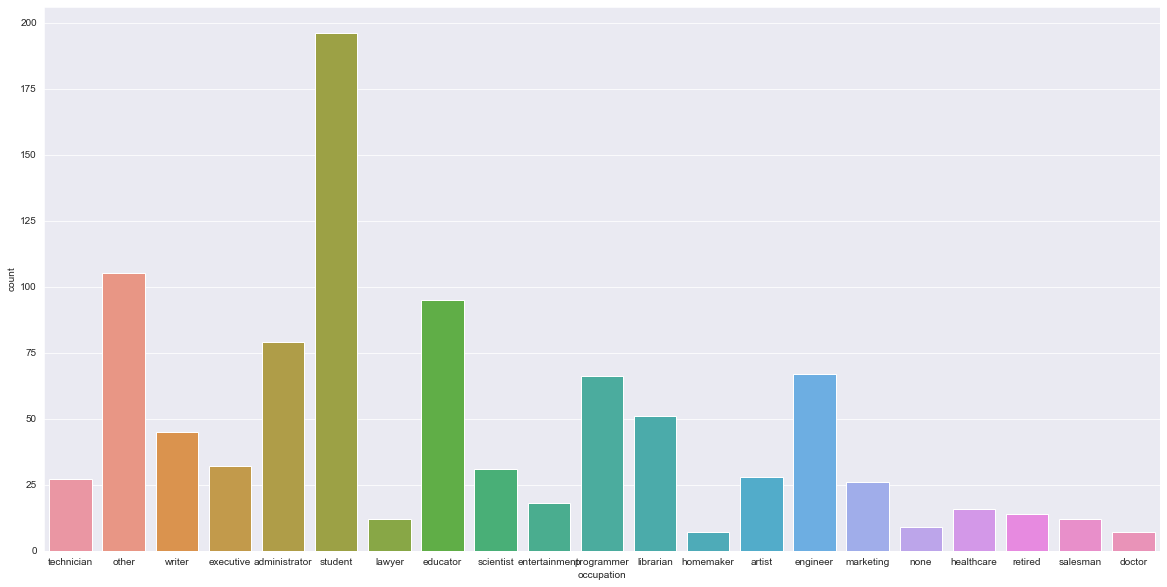

In [19]:
# Occupation
plt.figure(figsize=(20,10))
sns.countplot(df_users['occupation']);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [20]:
# Get rid of unwanted columns
unwanted_cols = ['movie id','movie title','release date','unknown']
# Get columns that includes generes and release year
required_cols = [col for col in df_movies.columns if col not in unwanted_cols]
# Use group by to get count per yer per genre
genre_per_year = df_movies[required_cols].groupby('release year').sum()
genre_per_year

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


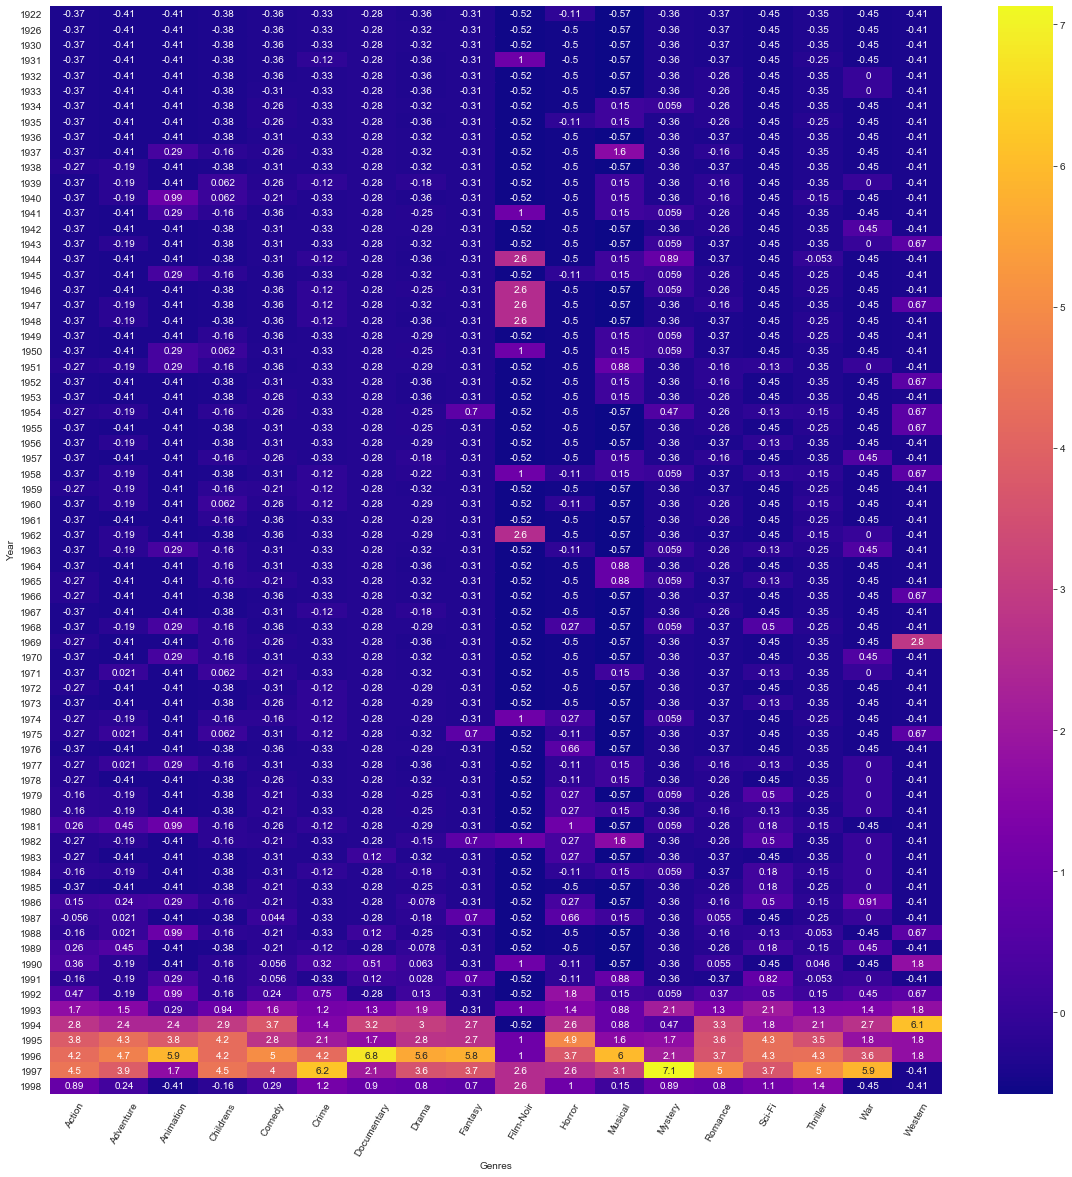

In [21]:
# Using Heat map to see the popularity
## Let's standarize the data in the each column so that we get correct visualization
plt.figure(figsize=(20,20))
hmap=sns.heatmap(genre_per_year.apply(zscore),annot=True,cmap="plasma")
hmap.set(xlabel="Genres", ylabel="Year")
hmap.set_xticklabels(hmap.get_xticklabels(), rotation=60)
plt.show()

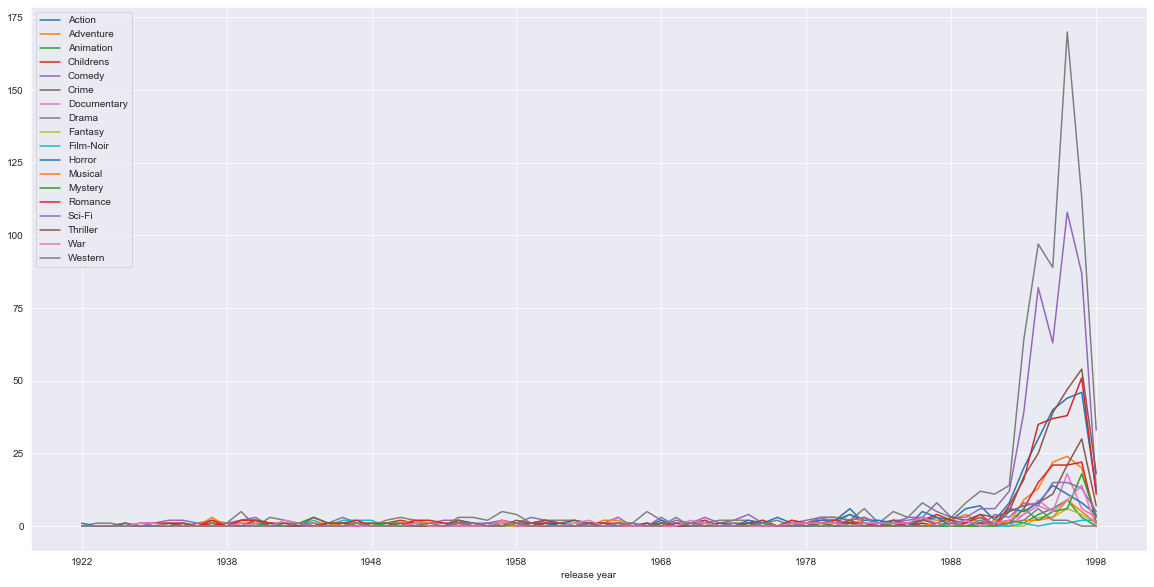

In [22]:
# Line chart
genre_per_year.plot(figsize=(20,10), kind="line");

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [23]:
# Finding the list of movies whose ratings are more than 100
merged_ratings_count = pd.merge(df_movies, df_ratings, how="inner", on="movie id").groupby(['movie id','movie title'])['rating'].count().reset_index()
over_100_ratings = merged_ratings_count[merged_ratings_count['rating'] > 100]
over_100_titles = over_100_ratings['movie title']
over_100_titles

# Finding average rating of the movies
merged_ratings_mean = pd.merge(df_movies, df_ratings, how="inner", on="movie id").groupby(['movie id','movie title'])['rating'].mean().reset_index()
merged_ratings_mean.sort_values(by='rating', ascending=False, inplace=True)

# Finding the movies which are present in the top list where the ratings are more than 100
top_movies = merged_ratings_mean[merged_ratings_mean['movie title'].isin(over_100_titles)]
df_out_3 = pd.DataFrame({"Movie Title":top_movies['movie title'],"Rating":top_movies['rating']})
df_out_3.set_index("Movie Title", inplace=True)
df_out_3.head(25)


,Rating
Movie Title,
"Close Shave, A",4.49
Schindler's List,4.47
"Wrong Trousers, The",4.47
Casablanca,4.46
"Shawshank Redemption, The",4.45
Rear Window,4.39
"Usual Suspects, The",4.39
Star Wars,4.36
12 Angry Men,4.34


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [24]:
# First, Merge all the datasets into one to get the single source of information
merged_ratings_users = pd.merge(df_ratings, df_users, how="inner", on="user id")
merged_all_data = pd.merge(merged_ratings_users,df_movies, how="inner", on="movie id")
#print(merged_all_data)

# Basic information from the above datasets
total_male = merged_all_data[merged_all_data.gender == 'M'].shape[0]
total_female = merged_all_data[merged_all_data.gender == 'F'].shape[0]

def genre_gender_percent(genre="Horror"):
    print("\n=====================Genre:{0}=====================\n".format(genre))
    filtered_count = merged_all_data[merged_all_data[genre]==1].groupby([genre, 'gender'])['gender'].count()
    female_count = filtered_count[1][0]
    male_count = filtered_count[1][1]
    mpercent=round(male_count/total_male*100,2)
    fpercent=round(female_count/total_female*100,2)
    printer(mpercent,fpercent,genre)
def printer(mpercent=0,fpercent=0,genre='Horror'):
    if (mpercent != 0 and fpercent != 0):
        if (mpercent > fpercent):
            print("\n {0}% Man watched more {1} than {2}% Woman\n".format(mpercent,genre,fpercent))
        elif (mpercent < fpercent):
            print("\n {0}% Woman watched more {1} than {2}% Man\n".format(fpercent,genre,mpercent))
        else:
            print("Invalid entry")

genre_gender_percent('Drama')
genre_gender_percent('Sci-Fi')
genre_gender_percent('Romance')


=====================Genre:Drama=====================


 42.77% Woman watched more Drama than 38.9% Man


=====================Genre:Sci-Fi=====================


 13.6% Man watched more Sci-Fi than 10.21% Woman


=====================Genre:Romance=====================


 22.76% Woman watched more Romance than 18.32% Man



## Conclusion:
To conclude the above questions:
* Men watch more drama than women: False
* Women watch more Sci-Fi than men: False
* Men watch more Romance than women: False
